# End to End Machine Learning for Binary Classification and Rain Prediction


This Jupyter Notebook covers the solution implementation of the first of 3-Project series on End to End ML for Binary Classification.


We are covering the following topics here:
1. Exploratory Data Analysis
2. Univariate Analysis
3. Bivariate Analysis
4. Feature Engineering and Scaling
5. Selecting and Training Model

> Each of these topics is a Milestone in the first project.


## Data 

We are using the [Rainfall prediction dataset from Kaggle](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package) which cotains daily weather observations from numerous Austrailian weather stations.


## Problem Statement
We aim to answer a very simple question - Whether it will rain tomorrow in Australia or not. 

## Importing Libraries

In [253]:
##importing libraries
import numpy as np  #for algebraic operations on arrays
import pandas as pd  #for data exploration and manipulation


##plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [254]:
data_path = '../data/weatherAUS.csv'

##loading the dataset into a dataframe
df = pd.read_csv(data_path)

##preview the dataset
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


## Exploratory Data Analysis

In [255]:
##to check the dimensions of the dataset
df.shape

(142193, 24)

In [256]:
##transposing the data to get a good understanding
df.head().T

,0,1,2,3,4
Date,2008-12-01,2008-12-02,2008-12-03,2008-12-04,2008-12-05
Location,Albury,Albury,Albury,Albury,Albury
MinTemp,13.4,7.4,12.9,9.2,17.5
MaxTemp,22.9,25.1,25.7,28,32.3
Rainfall,0.6,0,0,0,1
Evaporation,NaN,NaN,NaN,NaN,NaN
Sunshine,NaN,NaN,NaN,NaN,NaN
WindGustDir,W,WNW,WSW,NE,W
WindGustSpeed,44,44,46,24,41
WindDir9am,W,NNW,W,SE,ENE


There are a lot of variables/features here but the most interesting feature is the last column `RainTomorrow`. This is the target variable for our ML model which we want to predict.

It has 2 values:
* Yes - It will rain tomorrow.
* No - It will not rain tomorrow.


In [257]:
##As per the description of the dataset, 
##we have to drop RISK_MM column

df.drop(['RISK_MM'], axis=1, inplace=True)

In [258]:
##checking data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

**Interpretting Data Information**
* We have 142193 rows, any column that contains lesser number of rows has missing values.
* We have 24 columns.
* There are categorical features that have data type `float64`.
* There are numerical features that have data type `object`.

In [259]:
##statistical summary of numerical variables
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


In [260]:
##summary statistics for categorical columns
df.describe(include=['object'])


,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,142193,142193,132863,132180,138415,140787,142193
unique,3436,49,16,16,16,2,2
top,2016-06-15,Canberra,W,N,SE,No,No
freq,49,3418,9780,11393,10663,109332,110316


## Univariate Analysis

In [261]:
##exploring the target variable
##checking for missing values
df['RainTomorrow'].isnull().sum()

0

In [262]:
##number of unique values
df['RainTomorrow'].nunique()

2

In [263]:
##frequency distribution
df['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [264]:
##ratio of freq distribution of values
df['RainTomorrow'].value_counts() / len(df)

No     0.775819
Yes    0.224181
Name: RainTomorrow, dtype: float64

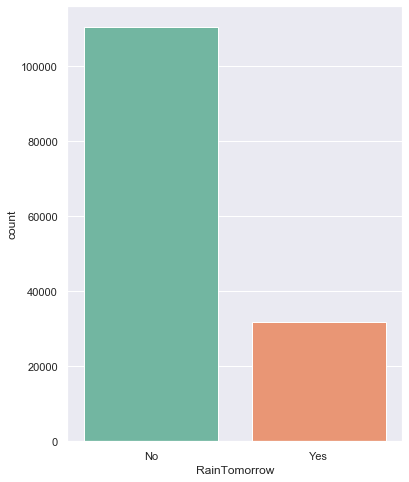

In [265]:
##visualizing the frequency distribution
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="RainTomorrow", data=df, palette="Set2")
plt.show()

### Takeaways from Univariate Analysis

1. We have 2 categories of values, `yes` and `No`.
2. We have far more negative(No) values than psitive(Yes) values.
3. `No` appears 77.5% of time, `Yes` appears 22.4% of time.

## Biravriate Analysis

Bivariate Analysis requires you to learn about relationships between pairs of variables.

First, segregating the categorical from the dataframe.

In [266]:
cat_vars = ['object']
cat_df = df.select_dtypes(include=cat_vars)
cat_df.head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


We have 7 categorical columns out of which:
* We have a Date column
* We have 6 categorical variables.
* `RainToday` and `RainTomorrow` are binary categorical features.
    

In [267]:
##counting the missing values in categorical features
cat_df.isnull().sum()

Date                0
Location            0
WindGustDir      9330
WindDir9am      10013
WindDir3pm       3778
RainToday        1406
RainTomorrow        0
dtype: int64

Next, we need to check for the number of labels each of these variables has. The number of labels a variable has defines its cardinality.

In [268]:
for var in list(cat_df.columns):
    print(var, 'has', len(cat_df[var].unique()), 'labels')

Date has 3436 labels
Location has 49 labels
WindGustDir has 17 labels
WindDir9am has 17 labels
WindDir3pm has 17 labels
RainToday has 3 labels
RainTomorrow has 2 labels


Date column needs to be converted to a DateTime column as it has a high cardinality which is a problem for our ML model.

In [269]:
##formatting Date column to DateTime data type
df['Date'] = pd.to_datetime(df['Date'])

##checking datat info again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           142193 non-null  datetime64[ns]
 1   Location       142193 non-null  object        
 2   MinTemp        141556 non-null  float64       
 3   MaxTemp        141871 non-null  float64       
 4   Rainfall       140787 non-null  float64       
 5   Evaporation    81350 non-null   float64       
 6   Sunshine       74377 non-null   float64       
 7   WindGustDir    132863 non-null  object        
 8   WindGustSpeed  132923 non-null  float64       
 9   WindDir9am     132180 non-null  object        
 10  WindDir3pm     138415 non-null  object        
 11  WindSpeed9am   140845 non-null  float64       
 12  WindSpeed3pm   139563 non-null  float64       
 13  Humidity9am    140419 non-null  float64       
 14  Humidity3pm    138583 non-null  float64       
 15  

In [270]:
##extracting year from date
df['Year'] = df['Date'].dt.year
df['Year'].head()

0    2008
1    2008
2    2008
3    2008
4    2008
Name: Year, dtype: int64

In [271]:
##extracting month from date
df['Month'] = df['Date'].dt.month
df['Month'].head()

0    12
1    12
2    12
3    12
4    12
Name: Month, dtype: int64

In [272]:
##extracting day from date
df['Day'] = df['Date'].dt.day
df['Day'].head()

0    1
1    2
2    3
3    4
4    5
Name: Day, dtype: int64

In [273]:
##dropping the original date column
df.drop(['Date'], axis=1, inplace=True)

In [274]:
##checking data head
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [275]:

cat_df = df.select_dtypes(include=cat_vars)
cat_df.columns

Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday',
       'RainTomorrow'],
      dtype='object')

In [276]:
##printing missing value and labels in each column
print(cat_df.isnull().sum(), "=============")
for var in list(cat_df.columns):
    print(var, 'has', len(cat_df[var].unique()), 'labels')

Location            0
WindGustDir      9330
WindDir9am      10013
WindDir3pm       3778
RainToday        1406
RainTomorrow        0
dtype: int64 =============
Location has 49 labels
WindGustDir has 17 labels
WindDir9am has 17 labels
WindDir3pm has 17 labels
RainToday has 3 labels
RainTomorrow has 2 labels


In [277]:
##one-hot encoding Location column
pd.get_dummies(df['Location'], drop_first=True).head()

##printing the sum of 1s in each column
print(pd.get_dummies(df['Location'], drop_first=True).sum(axis=0))

Albany              3016
Albury              3011
AliceSprings        3031
BadgerysCreek       2928
Ballarat            3028
Bendigo             3034
Brisbane            3161
Cairns              2988
Canberra            3418
Cobar               2988
CoffsHarbour        2953
Dartmoor            2943
Darwin              3192
GoldCoast           2980
Hobart              3188
Katherine           1559
Launceston          3028
Melbourne           2435
MelbourneAirport    3009
Mildura             3007
Moree               2854
MountGambier        3030
MountGinini         2907
Newcastle           2955
Nhil                1569
NorahHead           2929
NorfolkIsland       2964
Nuriootpa           3002
PearceRAAF          2762
Penrith             2964
Perth               3193
PerthAirport        3009
Portland            2996
Richmond            2951
Sale                3000
SalmonGums          2955
Sydney              3337
SydneyAirport       3005
Townsville          3033
Tuggeranong         2998


**We'll use the above method of one-hot encoding to prepare the training and testing datasets**

### Numerical Variables Analysis

In [278]:
##isolating numerical columns in a dataframe
numerics = ['int64', 'float64']
num_df = df.select_dtypes(include=numerics)
num_df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,2008,12,1
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,2008,12,2
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,2008,12,3
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,2008,12,4
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,2008,12,5


In [279]:
num_df.isnull().sum()

MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
Year                 0
Month                0
Day                  0
dtype: int64

16 numerical columns have missing values

#### Outlier Analysis

In [280]:
##summary statistics of all the columns
num_df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,141556.0,12.186400,6.403283,-8.5,7.6,12.0,16.8,33.9
MaxTemp,141871.0,23.226784,7.117618,-4.8,17.9,22.6,28.2,48.1
Rainfall,140787.0,2.349974,8.465173,0.0,0.0,0.0,0.8,371.0
Evaporation,81350.0,5.469824,4.188537,0.0,2.6,4.8,7.4,145.0
Sunshine,74377.0,7.624853,3.781525,0.0,4.9,8.5,10.6,14.5
WindGustSpeed,132923.0,39.984292,13.588801,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,140845.0,14.001988,8.893337,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,139563.0,18.637576,8.803345,0.0,13.0,19.0,24.0,87.0
Humidity9am,140419.0,68.843810,19.051293,0.0,57.0,70.0,83.0,100.0
Humidity3pm,138583.0,51.482606,20.797772,0.0,37.0,52.0,66.0,100.0


If we compare the mean of each column with the min/max value, we'll notice that `Rainfall`, `Evaporation`, `WindSpeed9am` and `WindSpeed3pm` might have outliers as there's a considerable difference between average value and max value.

Text(0.5, 0, 'WindSpeed3pm')

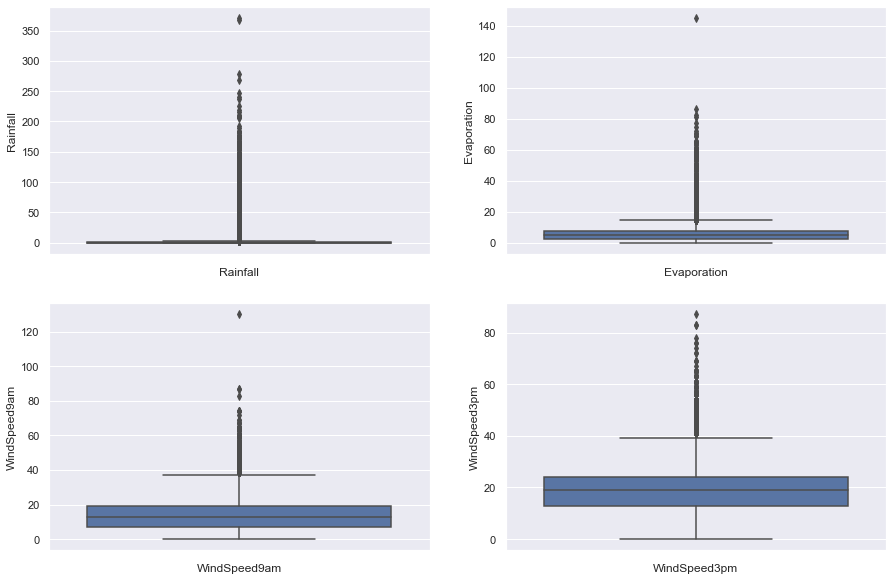

In [281]:

plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
ax = sns.boxplot(y=df["Rainfall"])
ax.set_xlabel("Rainfall")
sns.set(style="darkgrid")

plt.subplot(2, 2, 2)
sns.set(style="darkgrid")
ax = sns.boxplot(y=df["Evaporation"])
ax.set_xlabel("Evaporation")

plt.subplot(2, 2, 3)
sns.set(style="darkgrid")
ax = sns.boxplot(y=df["WindSpeed9am"])
ax.set_xlabel("WindSpeed9am")

plt.subplot(2, 2, 4)
sns.set(style="darkgrid")
ax = sns.boxplot(y=df["WindSpeed3pm"])
ax.set_xlabel("WindSpeed3pm")

In [282]:
##calculating outlier space for Rainfall

IQR = df.Rainfall.quantile(0.75) - df.Rainfall.quantile(0.25)
lf = df.Rainfall.quantile(0.25) - (IQR * 3)
uf = df.Rainfall.quantile(0.75) + (IQR * 3)
print('Outliers for the Rainfall are < {lbound} or > {ubound}'.format(
    lbound=lf, 
    ubound=uf)
     )



Outliers for the Rainfall are < -2.4000000000000004 or > 3.2


In [283]:
##calculating outlier space for Evaporation

IQR = df.Evaporation.quantile(0.75) - df.Evaporation.quantile(0.25)
lf = df.Evaporation.quantile(0.25) - (IQR * 3)
uf = df.Evaporation.quantile(0.75) + (IQR * 3)
print('Outliers for the Evaporation are < {lbound} or > {ubound}'.format(
    lbound=lf, 
    ubound=uf)
     )


Outliers for the Evaporation are < -11.800000000000002 or > 21.800000000000004


In [284]:
##calculating outlier space for WindSpeed9am

IQR = df.WindSpeed9am.quantile(0.75) - df.WindSpeed9am.quantile(0.25)
lf = df.WindSpeed9am.quantile(0.25) - (IQR * 3)
uf = df.WindSpeed9am.quantile(0.75) + (IQR * 3)
print('Outliers for the WindSpeed9am are < {lbound} or > {ubound}'.format(
    lbound=lf, 
    ubound=uf)
     )


Outliers for the WindSpeed9am are < -29.0 or > 55.0


In [285]:
##calculating outlier space for WindSpeed3pm

IQR = df.WindSpeed3pm.quantile(0.75) - df.WindSpeed3pm.quantile(0.25)
lf = df.WindSpeed3pm.quantile(0.25) - (IQR * 3)
uf = df.WindSpeed3pm.quantile(0.75) + (IQR * 3)
print('Outliers for the WindSpeed3pm are < {lbound} or > {ubound}'.format(
    lbound=lf, 
    ubound=uf)
     )


Outliers for the WindSpeed3pm are < -20.0 or > 57.0


#### Checking out the Correlation Matrix

In [286]:
##creating correlation matrix
corr = df.corr()

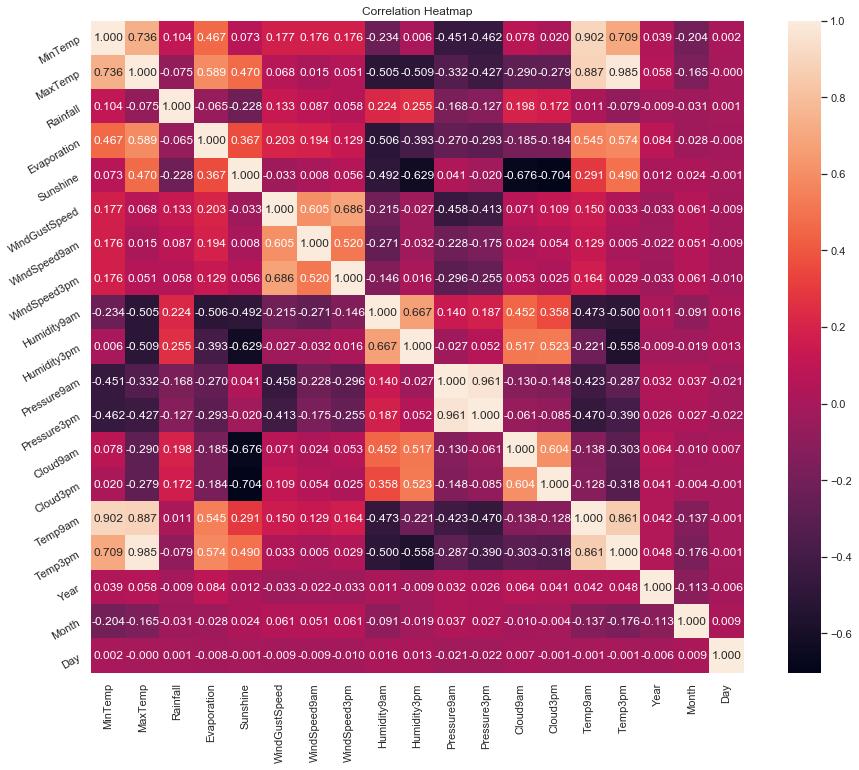

In [287]:
##plotting the correlation matrix
plt.figure(figsize=(16,12))
ax = sns.heatmap(corr, 
                 annot=True,
                 square=True,
                 fmt='.3f',
                 linecolor='black')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)
plt.title('Correlation Heatmap')
plt.show()

## Feature Engineering and Scaling

In [288]:
## segregating the target variable
X = df.drop(['RainTomorrow'], axis=1)
y = df['RainTomorrow'].copy()


In [289]:
y.shape

(142193,)

In [290]:
##creating training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=10)



In [291]:
print(X_train.shape, y_train.shape)

(113754, 24) (113754,)


#### 1. Imputing Missing Values

There are different methods to impute missing values for categorical and numerical variables.

1. We'll look at imputing missing values in numerical features.
2. Then, we'll look at imputing missing values in categorical features.


In [292]:
##creating a list numerical and categorical columns
num_cols = list(X_train.select_dtypes(include=numerics).columns)
cat_cols = list(X_train.select_dtypes(include=cat_vars).columns)

Since there are a lot of outliers in the data, we're going to use **median** strategy to impute rather than mean because median is not sensitive to outliers.

In [293]:
##imputing missing numerical values in both training and testing data
for df in [X_train, X_test]:
    for col in num_cols:
        col_median=X_train[col].median() # using median to impute
        df[col].fillna(col_median, inplace=True)    

Using the **mode** of each categorical column to impute the values

In [294]:
####imputing missing cat values in both training and testing data
for df in [X_train, X_test]:
    for col in cat_cols:
        col_mode=X_train[col].mode()[0]
        df[col].fillna(col_mode, inplace=True)  

In [295]:
##checking missing values
X_train.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Year             0
Month            0
Day              0
dtype: int64

In [296]:
X_test.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Year             0
Month            0
Day              0
dtype: int64

### Engineering Outliers

We're going to remove outliers from `Rainfall`, `Evaporation`, `WindSpeed9am` and `WindSpeed3pm` columns.

Removal strategy: Capping the max values and removing the rows that have values over the upper bound we calculated for each one of these columns.

In [297]:
def cap_max_values(df, var, max_value):
    return np.where(df[var]>max_value, max_value, df[var])

##removing outliers from both training and testing set
for df in [X_train, X_test]:
    df['Rainfall'] = cap_max_values(df, "Rainfall", 3.2)
    df['Evaporation'] = cap_max_values(df, "Evaporation", 21.8)
    df['WindSpeed9am'] = cap_max_values(df, "WindSpeed9am", 55.0)
    df['WindSpeed3pm'] = cap_max_values(df, "WindSpeed3pm", 57.0)

In [298]:
X_train[['Rainfall', 'Evaporation', 'WindSpeed9am', 'WindSpeed3pm']].describe().T



,count,mean,std,min,25%,50%,75%,max
Rainfall,113754.0,0.673769,1.183447,0.0,0.0,0.0,0.6,3.2
Evaporation,113754.0,5.141968,2.801487,0.0,4.0,4.8,5.4,21.8
WindSpeed9am,113754.0,13.973724,8.825401,0.0,7.0,13.0,19.0,55.0
WindSpeed3pm,113754.0,18.643775,8.701498,0.0,13.0,19.0,24.0,57.0


### One-Hot Encoding the Categorical columns

In [299]:
##converting dataframes into dictionaries
train_dict = X_train[cat_cols + num_cols].to_dict(orient='rows')
test_dict = X_test[cat_cols + num_cols].to_dict(orient='rows')


In [300]:
from sklearn.feature_extraction import DictVectorizer
 
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(dtype=<class 'numpy.float64'>, separator='=', sort=True,
               sparse=False)

In [301]:
X_train = dv.transform(train_dict)
X_test = dv.transform(test_dict)

In [305]:
X_train[0]

array([1.0000e+00, 7.0000e+00, 8.0000e+00, 1.6200e+01, 2.0000e+01,
       6.6000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       2.6600e+01, 1.8400e+01, 1.2000e+01, 1.0114e+03, 1.0126e+03,
       1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0900e+01, 2.5700e+01,
       1.8500e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e

In [306]:
##feature names of the encoded variables
print(len(dv.get_feature_names()))
cols = dv.get_feature_names()
print(cols)

118
['Cloud3pm', 'Cloud9am', 'Day', 'Evaporation', 'Humidity3pm', 'Humidity9am', 'Location=Adelaide', 'Location=Albany', 'Location=Albury', 'Location=AliceSprings', 'Location=BadgerysCreek', 'Location=Ballarat', 'Location=Bendigo', 'Location=Brisbane', 'Location=Cairns', 'Location=Canberra', 'Location=Cobar', 'Location=CoffsHarbour', 'Location=Dartmoor', 'Location=Darwin', 'Location=GoldCoast', 'Location=Hobart', 'Location=Katherine', 'Location=Launceston', 'Location=Melbourne', 'Location=MelbourneAirport', 'Location=Mildura', 'Location=Moree', 'Location=MountGambier', 'Location=MountGinini', 'Location=Newcastle', 'Location=Nhil', 'Location=NorahHead', 'Location=NorfolkIsland', 'Location=Nuriootpa', 'Location=PearceRAAF', 'Location=Penrith', 'Location=Perth', 'Location=PerthAirport', 'Location=Portland', 'Location=Richmond', 'Location=Sale', 'Location=SalmonGums', 'Location=Sydney', 'Location=SydneyAirport', 'Location=Townsville', 'Location=Tuggeranong', 'Location=Uluru', 'Location=Wag

After one hot encoding we have 118 columns in our training and testing set

### Feature Scaling

In [307]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [309]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [310]:
X_train.describe()

,Cloud3pm,Cloud9am,Day,Evaporation,Humidity3pm,Humidity9am,Location=Adelaide,Location=Albany,Location=Albury,Location=AliceSprings,...,WindGustDir=SSE,WindGustDir=SSW,WindGustDir=SW,WindGustDir=W,WindGustDir=WNW,WindGustDir=WSW,WindGustSpeed,WindSpeed3pm,WindSpeed9am,Year
count,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,...,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000
mean,0.587660,0.516255,0.490683,0.235870,0.514834,0.685305,0.021828,0.021045,0.021432,0.021292,...,0.063242,0.060789,0.062354,0.134430,0.056482,0.062538,0.262810,0.327084,0.254068,0.576287
std,0.264929,0.255205,0.293272,0.128509,0.205524,0.191520,0.146122,0.143536,0.144821,0.144355,...,0.243398,0.238944,0.241798,0.341116,0.230850,0.242132,0.101679,0.152658,0.160462,0.253951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.333333,0.233333,0.183486,0.370000,0.565657,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.193798,0.228070,0.127273,0.400000
50%,0.625000,0.555556,0.500000,0.220183,0.520000,0.696970,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.255814,0.333333,0.236364,0.600000
75%,0.750000,0.666667,0.733333,0.247706,0.650000,0.828283,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.310078,0.421053,0.345455,0.800000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Logistic Regression for Binary Classification


In [311]:
##import the class
from sklearn.linear_model import LogisticRegression


##instantiate the model class
logreg = LogisticRegression(solver='liblinear', random_state=0)


# train the model
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [312]:
##predicting the result
y_pred_test = logreg.predict(X_test)

y_pred_test


array(['Yes', 'No', 'No', ..., 'No', 'Yes', 'Yes'], dtype=object)

In [313]:
##probabilities for negative class
logreg.predict_proba(X_test)[:,0]


array([0.19339923, 0.93945024, 0.84416606, ..., 0.96821844, 0.22659788,
       0.04689904])

In [314]:
##probabilities for positive class
logreg.predict_proba(X_test)[:,1]

array([0.80660077, 0.06054976, 0.15583394, ..., 0.03178156, 0.77340212,
       0.95310096])

In [315]:
##model accuracy
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.8489
